# Tutorial 1: Simple quantum circuits

## Prerequisite: installation of myqlm

    pip install myqlm

    pip install myqlm-simulators


## Bell state circuit

Our aim is to prepare the Bell state $$\frac{|00\rangle + |11\rangle}{\sqrt{2}}$$

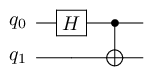

In [1]:
from qat.lang.AQASM import H, CNOT, Program

prog = Program()
reg = prog.qalloc(2)

prog.apply(H, reg[0])
prog.apply(CNOT, reg)

circ = prog.to_circ()

%qatdisplay circ

We now execute this circuit on a Quantum Processing Unit (QPU):

In [ ]:
from qat.qpus import get_default_qpu

qpu = get_default_qpu()
job = circ.to_job(nbshots=100)
res = qpu.submit(job)

We print the results:

In [ ]:
for sample in res:
    print(sample.state, sample.amplitude, sample.probability)

## Teleportation

Alice wants to send a qubit in state $|\psi\rangle$ to Bob with the help of a shared entangled pair between Alice and Bob.


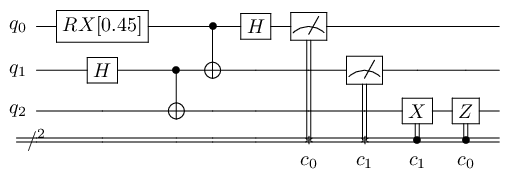

In [4]:
from qat.lang.AQASM import RX, X, Z

alpha = 0.45

prog = Program()
reg = prog.qalloc(3) # 1 qubit for |psi>, 2 qubits for Bell state
creg = prog.calloc(2) # 2 classical bits
# prepare state on Alice's side (unknown to Bob)
prog.apply(RX(alpha), reg[0])

# prepare Bell state
prog.apply(H, reg[1])
prog.apply(CNOT, reg[1], reg[2])

# teleportation circuit
CNOT(reg[0], reg[1]) # equivalent to prog.apply(CNOT, reg[0], reg[1])
H(reg[0])
prog.measure(reg[0], creg[0])
prog.measure(reg[1], creg[1])
prog.cc_apply(creg[1], X, reg[2])
prog.cc_apply(creg[0], Z, reg[2])

circ = prog.to_circ()

%qatdisplay circ

In [ ]:
qpu = get_default_qpu()
job = circ.to_job(nbshots=0)
res = qpu.submit(job)

for sample in res:
    print(sample.state, sample.amplitude)

In [ ]:
import numpy as np
# Expected result
# RX(alpha) |0> = cos(alpha/2) - i sin(alpha/2)
print("Expecting: %s |0> - i %s |1>"%(np.cos(alpha/2), np.sin(alpha/2)))